# Computer Vision
Computer Vision is a branch of artificial intelligence that explores the development of AI systems that can "see" the world, either in real-time through a camera or by analyzing images and video.

This notebook examines some common Computer Vision scenarios and uses Microsoft Cognitive Services in Azure to demonstrate them.

## Using the Custom Vision Cognitive Servive
The *Custom Vision* cognitive service enables you to create computer vision solutions for *image classification* or *object detection*.

In this notebook, you will create and train a Custom Vision image classification project that can identify pictures of apples and carrots, and use it to classify new images.

> **Note**: *Some of the images used in the lab are sourced from the free image library at <a href='http://www.pachd.com' target='_blank'>www.pachd.com</a>*

### Install the Custom Vision SDK
The first step is to install the Python SDK for the Custom Vision service:

In [29]:
PREDICTION_KEY = '8af00d289c7c43fca8a34b97dccf5d41'
CV_ENDPOINT = 'https://gmalccv-prediction.cognitiveservices.azure.com/'
PREDICTION_RESOURCE_ID = "/subscriptions/89429ec6-7544-4e27-b768-1172cdc01efa/resourceGroups/gmalc-cog/providers/Microsoft.CognitiveServices/accounts/gmalccv-Prediction"
PROJECT_ID = 'decd626a-4905-40b0-b38a-238ea443cd01'
MODEL_NAME = 'traffic'
print('Ready to predict!')

Ready to predict!


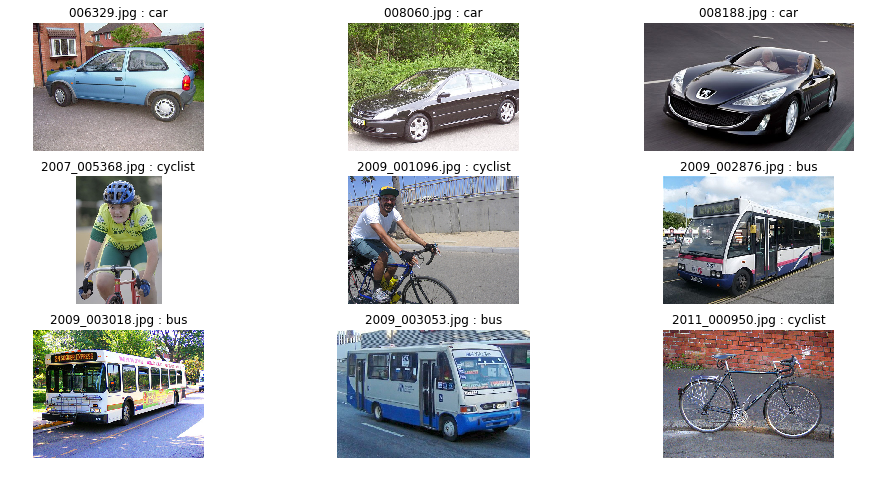

In [30]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

# Get the test images from the data/voc/test folder
test_folder = os.path.join('data', 'voc', 'test')
test_images = os.listdir(test_folder)

# Create an instance of the prediction service
predictor = CustomVisionPredictionClient(PREDICTION_KEY, endpoint=CV_ENDPOINT)

# Create a figure to display the results
fig = plt.figure(figsize=(16, 8))

# Get the images and show the predicted classes
for idx in range(len(test_images)):
    with open(os.path.join(test_folder, test_images[idx]), "rb") as image_contents:
        results = predictor.classify_image(PROJECT_ID, MODEL_NAME, image_contents.read())
    # The results include a prediction for each tag, in descending order of probability - get the first one
    prediction = results.predictions[0].tag_name
    img = Image.open(os.path.join(test_folder, test_images[idx]))
    # Plot the image and its predicted class
    a=fig.add_subplot(len(test_images)/3, 3,idx+1)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(test_images[idx] + ' : ' + prediction)

plt.show()

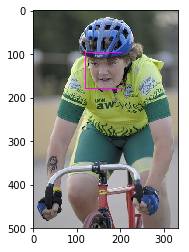

In [31]:
COG_ENDPOINT = 'https://westus2.api.cognitive.microsoft.com/'
COG_KEY = 'b41c697e93294fda9f3ce8e147f1c2bd'

from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials


# Create an authenticated FaceClient.
face_client = FaceClient(COG_ENDPOINT, CognitiveServicesCredentials(COG_KEY))

import os
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw
%matplotlib inline

img_path = os.path.join('data','voc','test', '2009_001096.jpg')
img_path = os.path.join('data','voc','test', '2007_005368.jpg')
img = Image.open(img_path)


with open(img_path, 'rb') as image_stream:
    detected_faces = face_client.face.detect_with_stream(image=image_stream)
print(detected_faces)
if detected_faces:
    for face in detected_faces:
        r = face.face_rectangle
        bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
        draw = ImageDraw.Draw(img)
        draw.rectangle(bounding_box, outline='magenta')
plt.imshow(img)

In [32]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import os
%matplotlib inline

# Get the test images from the data/voc/test folder
test_folder = os.path.join('data', 'voc', 'test')
test_images = os.listdir(test_folder)

# Create an instance of the prediction service
predictor = CustomVisionPredictionClient(PREDICTION_KEY, endpoint=CV_ENDPOINT)

# Create an authenticated FaceClient.
face_client = FaceClient(COG_ENDPOINT, CognitiveServicesCredentials(COG_KEY))

# Create a figure to display the results
fig = plt.figure(figsize=(16, 8))

# Get the images and show the predicted classes
for idx in range(len(test_images)):
    with open(os.path.join(test_folder, test_images[idx]), "rb") as image_contents:
        classification = predictor.classify_image(PROJECT_ID, MODEL_NAME, image_contents.read())
        detected_faces = face_client.face.detect_with_stream(image=image_contents)
    # The results include a prediction for each tag, in descending order of probability - get the first one
    prediction = classification.predictions[0].tag_name
    img = Image.open(os.path.join(test_folder, test_images[idx]))
    if detected_faces:
        for face in detected_faces:
            r = face.face_rectangle
            bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
            draw = ImageDraw.Draw(img)
            draw.rectangle(bounding_box, outline='magenta')
    # Plot the image and its predicted class
    a=fig.add_subplot(len(test_images)/3, 3,idx+1)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(test_images[idx] + ' : ' + prediction)

plt.show()

APIErrorException: (InvalidImageSize) Image size is too small.

### Create a Custom Vision service instance
Now you're ready to use the Custom Vision service. You'll need to create an instance of the service and get your unique training and prediction keys so you can access it:
1. If you don't already have an Azure subscription, sign up for a free trial at https://azure.microsoft.com/Account/Free.
2. Create a **Custom Vision** resource in your subscription. Specify any available location, and select the **F0** pricing tier for both *prediction* and *training*. You can create a new resource group or use an existing one if you have one.
3. Go to https://customvision.ai/ and sign in using the Microsoft account associated with your Azure subscription.
4. Click the *Settings* (&#9881;) icon at the top right to view the *prediction* and *training* resources that you created. Then expand your prediction and training resources, modify the *TRAINING KEY*, *PREDICTION KEY*, *ENDPOINT* (should be the same for both resources), and *PREDICTION_RESOURCE_ID* variables below to match their settings, and run the cell:

In [ ]:
TRAINING_KEY = 'YOUR_TRAINING_KEY'
PREDICTION_KEY = 'YOUR_PREDICTION_KEY'
ENDPOINT='https://YOUR_REGION.api.cognitive.microsoft.com' # Use just the base URL - https://<region>.api.cognitive.microsoft.com
PREDICTION_RESOURCE_ID="/subscriptions/YOUR_SUBSCRIPTION_ID/resourceGroups/YOUR_RESOURCE_GROUP/providers/Microsoft.CognitiveServices/accounts/YOUR_ACCOUNT_Prediction"

## Creating an *Image Classification* Solution

Image classification is a type of supervised machine learning that classifies images into categories based on their contents. In this case, we're going to create a classifier that analyzes images to determine whether they contain a picture of a *carrot* or an *apple*.

### Create a Custom Vision project
First, we'll create a project for the apple/carrot classifier:

In [ ]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient

trainer = CustomVisionTrainingClient(TRAINING_KEY, endpoint=ENDPOINT)

# Create a new project
print ("Creating project...")
project = trainer.create_project("Produce Classification")
print("Created project!")

### Add tags
The project will identify images as apples or carrots, so we'll need tags for those classes:

In [ ]:
# Make two tags in the new project
print("Creating tags...")
apple_tag = trainer.create_tag(project.id, "Apple")
carrot_tag = trainer.create_tag(project.id, "Carrot")
print('Created tags!')

### Upload training images
Now that we've got the tags, we need to upload some images of apples and carrots, assign the appropriate tags:

In [ ]:
import os

print("Adding images...")

apples_dir = "data/apples"
for image in os.listdir(apples_dir):
    print(image)
    with open(os.path.join(apples_dir, image), mode="rb") as img_data: 
        trainer.create_images_from_data(project.id, img_data.read(), [apple_tag.id])

carrots_dir = "data/carrots"
for image in os.listdir(carrots_dir):
    print(image)
    with open(os.path.join(carrots_dir, image), mode="rb") as img_data: 
        trainer.create_images_from_data(project.id, img_data.read(), [carrot_tag.id])
        
print('Added images!')

Return to your Custom Vision service and click the *Home* (&#8962;) icon to return to the home page, and then open the ***Apple or Carrot*** project to view the images that have been uploaded and tagged.

### Train the project
With the tagged images in place, we're now ready to train a classification model:

In [ ]:
import time

print ("Training...")
# Train the project, checking status every 1 second
iteration = trainer.train_project(project.id)
while (iteration.status == "Training"):
    iteration = trainer.get_iteration(project.id, iteration.id)
    print ("Training status: " + iteration.status)
    time.sleep(1)

# The iteration is now trained. Publish it to the project endpoint
trainer.publish_iteration(project.id, iteration.id, "First Iteration", PREDICTION_RESOURCE_ID)

# Make it the default iteration
iteration = trainer.update_iteration(project_id= project.id, iteration_id=iteration.id, name= "First Iteration", is_default=True)

print ("Trained!")

Return to your Custom Vision service and click the **Performance** tab to view the *Precision* and *Recall* metrics for your trained project. These should be pretty high, even through we only used a few images.

### Use the project to classify images
Now that we have a trained project, we can use it to predict the class of new images that weren't in the training dataset:

In [ ]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
%matplotlib inline

# Use two test images
test_img1_url = 'http://www.pachd.com/free-images/food-images/apple-01.jpg'
test_img2_url = 'http://www.pachd.com/free-images/food-images/carrot-02.jpg'

test_image_urls = []
test_image_urls.append(test_img1_url)
test_image_urls.append(test_img2_url)

# Create an instance of the prediction service
predictor = CustomVisionPredictionClient(PREDICTION_KEY, endpoint=ENDPOINT)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Get the images and show the predicted classes
for url_idx in range(len(test_image_urls)):
    response = requests.get(test_image_urls[url_idx])
    image_contents = Image.open(BytesIO(response.content))
    results = predictor.classify_image_url(project_id=project.id, published_name=iteration.name, url=test_image_urls[url_idx])
    # The results include a prediction for each tag, in descending order of probability - so we'll get the first one
    prediction = results.predictions[0].tag_name + ": {0:.2f}%".format(results.predictions[0].probability * 100)
    # Subplot for image and its predicted class
    a=fig.add_subplot(1,2,url_idx+1)
    imgplot = plt.imshow(image_contents)
    a.set_title(prediction)

plt.show()

## Classify a local image

Previously, we predicted the class of an image based on a URL - what if you have the image as a local file?

Let's download the test images:

In [ ]:
# Get two test images
!wget 'http://www.pachd.com/free-images/food-images/apple-01.jpg' -O "data/test_apple.jpg"
!wget 'http://www.pachd.com/free-images/food-images/carrot-01.jpg' -O "data/test_carrot.jpg"

Now we'll modify our prediction code a little to read the contents of the local image file and submit it to the Custom Vision service.

In [ ]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

# Use two test images
test_image1_file = os.path.join("data", "test_apple.jpg")
test_image2_file = os.path.join("data", "test_carrot.jpg")

test_images = []
test_images.append(test_image1_file)
test_images.append(test_image2_file)

# Create an instance of the prediction service
predictor = CustomVisionPredictionClient(PREDICTION_KEY, endpoint=ENDPOINT)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Get the images and show the predicted classes
for idx in range(len(test_images)):
    with open(test_images[idx], "rb") as image_contents:
        results = predictor.classify_image(project.id, iteration.name, image_contents.read())
    # The results include a prediction for each tag, in descending order of probability - so we'll get the first one
    prediction = results.predictions[0].tag_name + ": {0:.2f}%".format(results.predictions[0].probability * 100)
    img = Image.open(test_images[idx])
    # Subplot for image and its predicted class
    a=fig.add_subplot(1,2,idx+1)
    imgplot = plt.imshow(img)
    a.set_title(prediction)

plt.show()

## Using the Computer Vision Service
The *Custom Vision* service provides a great way to train your own image classification or object detection models.
More general image analysis capabilities are encapsulated in the similarly named *Computer Vision* cognitive service.

### Create a Cognitive Services Service
First, you need to provision a Computer Vision service in your Azure subscription. Computer Vision is available as a standalone service or as part of the unified *Cognitive Services* service. If you don't already have a cognitive services service, follow these steps create one:

1. Open another browser tab and navigate to https://portal.azure.com.
2. Sign in using your Microsoft account.
3. Click **+ New**, and search for *Cognitive Services*. Then create a new **Cognitive Services** resource - this resource provides unified access to multiple cognitive services, such as computer vision and text APIs, using a single, unified key.


When deployment is complete, view the Cognitive Services resource you created, and pn the **Overview** page, note the **Endpoint** URL. Then assign the base URI (*region*.api.cognitive.microsoft.com) for your service to the **COGNITIVE_URI** variable in the cell below. Then click **Keys** and then copy **Key 1** to the clipboard and paste it into the **COGNITIVE_KEY** variable assignment value in the cell below.

In [ ]:
COGNITIVE_URI = 'REGION.api.cognitive.microsoft.com'
COGNITIVE_KEY = 'YOUR_KEY'

print("Ready to use Cognitive Services")

### Use the Computer Vision API to Get Image Features
The Computer Vision API uses a machine learning model that has been trained with millions of images. It can extract features from images and return a suggested description, as well as a suggested list of "tags" that apply to it.

Run the cell below to see what caption the Computer Vision API suggests for an image of your's truly!

In [ ]:
from matplotlib.pyplot import imshow
from PIL import Image
import requests
from io import BytesIO
%matplotlib inline

def get_image_features(img_url):
    import http.client, urllib.request, urllib.parse, urllib.error, base64, json

    headers = {
        # Request headers.
        'Content-Type': 'application/json',
        'Ocp-Apim-Subscription-Key': COGNITIVE_KEY,
    }

    params = urllib.parse.urlencode({
        # Request parameters. All of them are optional.
        'visualFeatures': 'Categories,Description,Color',
        'language': 'en',
    })

    body = "{'url':'" + img_url + "'}"

    try:
        # Execute the REST API call and get the response.
        conn = http.client.HTTPSConnection(COGNITIVE_URI)
        conn.request("POST", "/vision/v1.0/analyze?%s" % params, body, headers)
        response = conn.getresponse()
        data = response.read()

        # 'data' contains the JSON response.
        parsed = json.loads(data.decode("UTF-8"))
        if response is not None:
            return parsed
        conn.close()


    except Exception as e:
        print('Error:')
        print(e)
        
        
# Get the image and show it
img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/graeme2.jpg'
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)
        
jsonData = get_image_features(img_url)
desc = jsonData['description']['captions'][0]['text']
print(desc)

The description is reasonably, if not exactly, accurate (there's no tie, but I am wearing a jacket).

Let's try again with a different image:

In [ ]:
img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/soccer.jpg'

# Get the image and show it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)
jsonData = get_image_features(img_url)
desc = jsonData['description']['captions'][0]['text']
print(desc)

This time, the image is much more complex; but the Computer Vision service does a reasonable job of identifying correctly what's going on (note to Americans, the game you know as "soccer" is called "football" in almost every other nation on the planet!)

## Using the Face API
While the Computer Vision API is useful for general image analysis, the Face API offers specific functions for analyzing faces in images. This can be useful in a variety of AI scenarios.

### Install and configure the Face API SDK
A Python SDK for the Face API makes it easier to use it from Python code. Let's install the SDK and configure it to use the Face API in the cognitive services resource we created previously.

In [ ]:
!pip install cognitive_face

import cognitive_face as CF

face_URI = "https://" + COGNITIVE_URI + "/face/v1.0/"

# Set URI and Key
CF.BaseUrl.set(face_URI)
CF.Key.set(COGNITIVE_KEY)

print("Face API ready at", CF.BaseUrl.base_url)

Now you're ready to use the Face API. First, let's see if we can detect a face in an image:

In [ ]:
from matplotlib.pyplot import imshow
from PIL import Image
import requests
from io import BytesIO
%matplotlib inline

img_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/graeme1.jpg'

response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)

result = CF.face.detect(img_url)
print (result)

The Face API has detected one face, and assigned it an ID. It also returns the coordinates for the top left corner and the width and height for the rectangle within which the face is detected.

Run the cell below to show the rectangle on the image.

In [ ]:
%matplotlib inline
import requests
from io import BytesIO
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

# Get the image
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

# Add rectangles for each face found
color="blue"
if result is not None:
    draw = ImageDraw.Draw(img) 
    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        left = faceRectangle['left']
        top = faceRectangle['top']
        width = faceRectangle['width']
        height = faceRectangle['height']
        draw.line([(left,top),(left+width,top)],fill=color, width=5)
        draw.line([(left+width,top),(left+width,top+height)],fill=color , width=5)
        draw.line([(left+width,top+height),(left, top+height)],fill=color , width=5)
        draw.line([(left,top+height),(left, top)],fill=color , width=5)

# show the image
imshow(img)


As well as detecting the face, the Face API assigned an ID to this face. The ID is retained by the service for a while, enabling you to reference it. Run the following cell to see the ID assigned to the face that has been detected:

In [ ]:
face1 = result[0]['faceId']
print ("Face 1:" + face1)

One useful thing you can do with the face ID is, is to use it to compare another image and see if a matching face is found. This kind of facial comparison is common in a variety of security / user authentication scenarios.

Let's try it with another image of the same person:

In [ ]:
# Get the image to compare
img2_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/graeme2.jpg'
response2 = requests.get(img2_url)
img2 = Image.open(BytesIO(response2.content))

# Detect faces in a comparison image
result2 = CF.face.detect(img2_url)

# Assume the first face is the one we want to compare
if result2 is not None:
    face2 = result2[0]['faceId']
    print ("Face 2:" + face2)

def verify_face(face1, face2):
    # By default, assume the match is unverified
    verified = "Not Verified"
    color="red"

    # compare the comparison face to the original one we retrieved previously
    verify = CF.face.verify(face1, face2)

    # if there's a match, set verified and change color to green
    if verify['isIdentical'] == True:
        verified = "Verified"
        color="lightgreen"

    # Display the second face with a red rectange if unverified, or green if verified
    draw = ImageDraw.Draw(img2) 
    for currFace in result2:
        faceRectangle = currFace['faceRectangle']
        left = faceRectangle['left']
        top = faceRectangle['top']
        width = faceRectangle['width']
        height = faceRectangle['height']
        draw.line([(left,top),(left+width,top)] , fill=color, width=5)
        draw.line([(left+width,top),(left+width,top+height)] , fill=color, width=5)
        draw.line([(left+width,top+height),(left, top+height)] , fill=color, width=5)
        draw.line([(left,top+height),(left, top)] , fill=color, width=5)

    # show the image
    imshow(img2)

    # Display verification status and confidence level
    print(verified)
    print ("Confidence Level: " + str(verify['confidence']))

verify_face(face1, face2)

The service has matched the face in a similar photo, with a reasonably high confidence level.

But what about the same face in a different photo - maybe with a stylish goatee beard and sunglasses?:

In [ ]:
# Get the image to compare
img2_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/graeme3.jpg'
response2 = requests.get(img2_url)
img2 = Image.open(BytesIO(response2.content))

# Detect faces in a comparison image
result2 = CF.face.detect(img2_url)

# Assume the first face is the one we want to compare
face2 = result2[0]['faceId']
print ("Face 2:" + face2)

verify_face(face1, face2)

Again, the face is matched - but with lower confidence reflecting the differences in the image.

What if we try to match the original face to a different person?

In [ ]:
# Get the image to compare
img2_url = 'https://raw.githubusercontent.com/MicrosoftLearning/AI-Introduction/master/files/satya.jpg'
response2 = requests.get(img2_url)
img2 = Image.open(BytesIO(response2.content))

# Detect faces in a comparison image
result2 = CF.face.detect(img2_url)

# Assume the first face is the one we want to compare
face2 = result2[0]['faceId']
print ("Face 2:" + face2)

verify_face(face1, face2)

## Learn More
* Check out the Custom Vision Service documentation at https://docs.microsoft.com/en-us/azure/cognitive-services/Custom-Vision-Service/home
* The Computer Vision Service documentation is at https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/
* The Face API documentation is at https://docs.microsoft.com/en-us/azure/cognitive-services/face/